In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('../Data/tweets/elon_archive.csv')

In [141]:
keep = ['date','time','username','name','tweet']
for i in df.keys():
    if i not in keep:
        df = df.drop(columns=[i])
        
year = []
month = []
day = []
        
df.drop(df.loc[df['date']=='date'].index, inplace=True)

for i in df.index:
    date = df['date'][i]
    date = date.split('-')
    year.append(int(date[0]))
    month.append(int(date[1]))
    day.append(int(date[2]))
    
df['month'] = month
df['year'] = year
df['day'] = day
    
    
hour = []
minute = []
second = []

for i in df.index:
    time = df['time'][i]
    time = time.split(':')
    hour.append(int(time[0]))
    minute.append(int(time[1]))
    second.append(int(time[2]))
    
df['hour'] = hour
df['minute'] = minute
df['second'] = second


In [142]:
# check if tweets are related to relevant crypto currency, add column denoting if they are related
get = df[["tweet"]]
get = np.array(get)
crypto_related = []
tweet_length = []

for i in get:
    for data in i:
        tweet_length.append(len(data))
        split = data.split(" ")
        if data.lower().count("doge") > 0 or data.lower().count("bitcoin") > 0  or data.lower().count("btc") or data.lower().count("crypto"):
            crypto_related.append(True)
        else:
            crypto_related.append(False)
df['tweet_length'] = tweet_length
df['crypto_related'] = crypto_related

In [143]:
df.query('date == "2021-05-07"') # SNL TWEET

,date,time,username,name,tweet,month,year,day,hour,minute,second,tweet_length,crypto_related
1415,2021-05-07,20:22:52,elonmusk,Elon Musk,Cybertruck prototype in New York this weekend,5,2021,7,20,22,52,45,False
1416,2021-05-07,18:23:12,elonmusk,Elon Musk,@EvaFoxU 🤣🤣,5,2021,7,18,23,12,11,False
1417,2021-05-07,16:11:45,elonmusk,Elon Musk,@OwenSparks_ Until Sunday,5,2021,7,16,11,45,25,False
1418,2021-05-07,16:05:35,elonmusk,Elon Musk,Guest starring … https://t.co/buM3bTOWbX,5,2021,7,16,5,35,41,False
1419,2021-05-07,15:57:52,elonmusk,Elon Musk,https://t.co/DlQtmfjKqL,5,2021,7,15,57,52,24,False


In [144]:
df

,date,time,username,name,tweet,month,year,day,hour,minute,second,tweet_length,crypto_related
0,2021-11-14,17:48:31,elonmusk,Elon Musk,@ConsumerReports 👍,11,2021,14,17,48,31,18,False
1,2021-11-14,15:35:40,elonmusk,Elon Musk,@WholeMarsBlog Exactly,11,2021,14,15,35,40,22,False
2,2021-11-14,15:33:04,elonmusk,Elon Musk,@realTylerZed @SenSanders 🤣,11,2021,14,15,33,4,27,False
3,2021-11-14,09:24:02,elonmusk,Elon Musk,"@SenSanders Want me to sell more stock, Bernie...",11,2021,14,9,24,2,67,False
4,2021-11-14,08:39:18,elonmusk,Elon Musk,"@fermatslibrary Soon, that list will grow much...",11,2021,14,8,39,18,86,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11924,2011-12-03,02:22:07,elonmusk,Elon Musk,That was a total non sequitur btw,12,2011,3,2,22,7,33,False
11925,2011-12-03,02:20:28,elonmusk,Elon Musk,"Great Voltaire quote, arguably better than Twa...",12,2011,3,2,20,28,136,False
11926,2011-12-01,04:29:04,elonmusk,Elon Musk,I made the volume on the Model S http://t.co/...,12,2011,1,4,29,4,118,False
11927,2011-12-01,03:55:11,elonmusk,Elon Musk,Went to Iceland on Sat to ride bumper cars on ...,12,2011,1,3,55,11,141,False


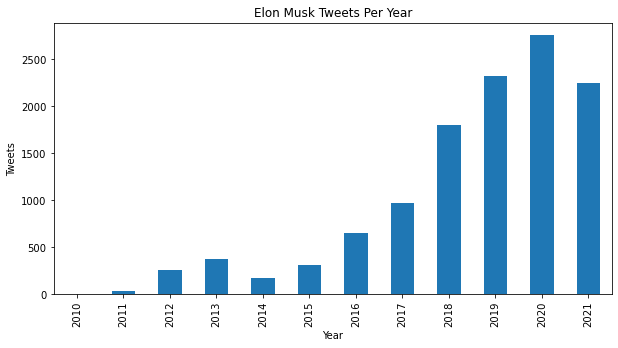

In [145]:
plt.figure(figsize=(10,5))
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
data = df['year'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Tweets")
plt.title("Elon Musk Tweets Per Year")
plt.show()

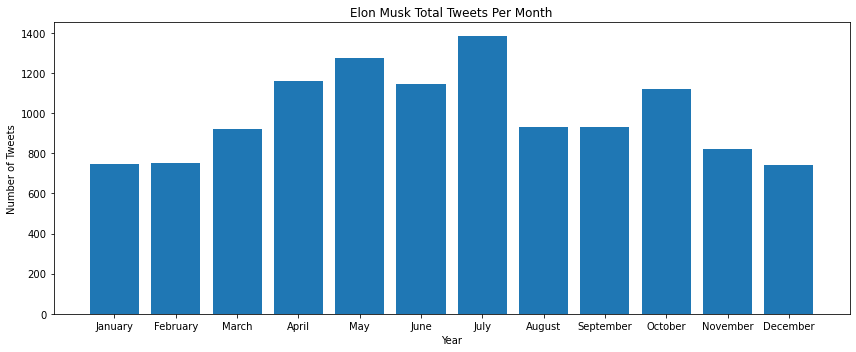

In [146]:
plt.figure(figsize=(12,5))
Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
data = df['month'].value_counts(sort=False).sort_index()
plt.bar(Months,data)
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.title("Elon Musk Total Tweets Per Month")
plt.tight_layout()
plt.show()

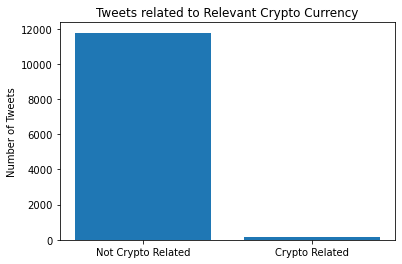

In [147]:
data = df['crypto_related'].value_counts()
label = ['Not Crypto Related','Crypto Related']
plt.ylabel("Number of Tweets")
plt.title('Tweets related to Relevant Crypto Currency')
plt.bar(label,data)
plt.show()

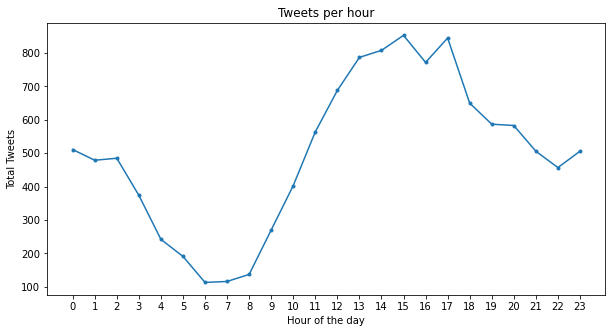

In [148]:
data = df['hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.title('Tweets per hour')
plt.plot(data,marker='.')
plt.xlabel('Hour of the day')
plt.ylabel('Total Tweets')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.show()